In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [30]:
# CSV 파일 불러오기
df = pd.read_csv("/content/sample_data/car_evaluation.csv", header=None)
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug', 'safety', 'class']
df

,buying,maint,doors,persons,lug,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [32]:
print("결측치 확인:\n", df.isnull().sum())

결측치 확인:
 buying     0
maint      0
doors      0
persons    0
lug        0
safety     0
class      0
dtype: int64


In [33]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug,0
safety,0
class,0


In [36]:
# 컬렴명 확인
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug', 'safety', 'class'], dtype='object')

In [38]:
columns = ['buying', 'maint', 'doors', 'persons', 'lug', 'safety', 'class']
label_encoders = {}
for column in columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])
df

,buying,maint,doors,persons,lug,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [39]:
# 1. 데이터 전처리 (X: 특성, y: 타겟)
X = df.drop('class', axis=1)
y = df["class"]

# 2. One-hot Encoding
X = X.values
Y = pd.get_dummies(y).values
print(X)
print(Y)

[[3 3 0 0 2 1]
 [3 3 0 0 2 2]
 [3 3 0 0 2 0]
 ...
 [1 1 3 2 0 1]
 [1 1 3 2 0 2]
 [1 1 3 2 0 0]]
[[False False  True False]
 [False False  True False]
 [False False  True False]
 ...
 [False False  True False]
 [False  True False False]
 [False False False  True]]


In [42]:
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X)

[[ 1.34164079  1.34164079 -1.34164079 -1.22474487  1.22474487  0.        ]
 [ 1.34164079  1.34164079 -1.34164079 -1.22474487  1.22474487  1.22474487]
 [ 1.34164079  1.34164079 -1.34164079 -1.22474487  1.22474487 -1.22474487]
 ...
 [-0.4472136  -0.4472136   1.34164079  1.22474487 -1.22474487  0.        ]
 [-0.4472136  -0.4472136   1.34164079  1.22474487 -1.22474487  1.22474487]
 [-0.4472136  -0.4472136   1.34164079  1.22474487 -1.22474487 -1.22474487]]


In [43]:
# 3. 데이터 분할 (훈련 80%, 테스트 20%)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("data SHAPE :")
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

data SHAPE :
(1382, 6) (1382, 4)
(346, 6) (346, 4)


In [44]:
import tensorflow as tf
from tensorflow import keras

# 4. Defining the model
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

model = Sequential()
model.add(Dense(32,input_shape=(6,),activation='relu'))  # 입력층 및 첫 번째 은닉층 (출력 뉴런 64개)
model.add(Dense(16,activation='relu'))  # 두 번째 은닉층 (출력 뉴런 32개)
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='softmax'))  # 출력층 (출력 뉴런 10개, 이진 분류 → sigmoid /다중 분류 → softmax)
model.compile(Adam(learning_rate=0.001),'categorical_crossentropy',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │              36 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 924 (3.61 KB)

 Trainable params: 924 (3.61 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
# 5. Fitting
model_history=model.fit(x=X_train, y=y_train, epochs=25, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.1392 - loss: 1.5385 - val_accuracy: 0.4480 - val_loss: 1.3552
Epoch 2/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5814 - loss: 1.3270 - val_accuracy: 0.6821 - val_loss: 1.1774
Epoch 3/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7111 - loss: 1.0618 - val_accuracy: 0.6792 - val_loss: 0.8016
Epoch 4/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6959 - loss: 0.7592 - val_accuracy: 0.6821 - val_loss: 0.7185
Epoch 5/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7302 - loss: 0.6665 - val_accuracy: 0.6994 - val_loss: 0.6868
Epoch 6/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7253 - loss: 0.6559 - val_accuracy: 0.7139 - val_loss: 0.6576
Epoch 7/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7423 - loss: 0.6250 - val_accuracy: 0.7283 - val_loss: 0.6278
Epoch 8/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7261 - loss: 0.6274 - val_accuracy: 0.7341 - val_lo

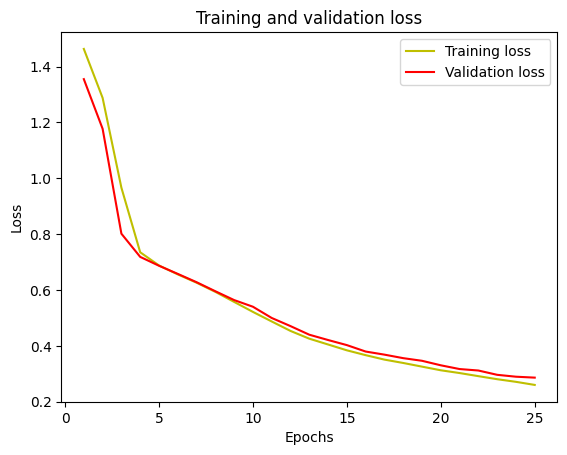

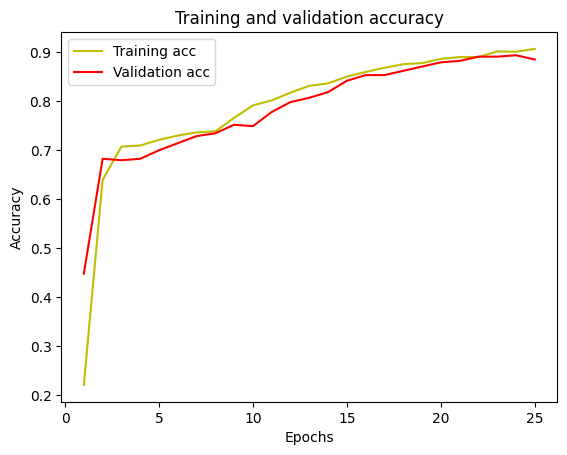

In [46]:
# 6. Training and validation Loss/ Accuracy
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [48]:
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.71      0.87      0.78        83
           1       1.00      0.18      0.31        11
           2       0.95      0.99      0.97       235
           3       0.00      0.00      0.00        17

    accuracy                           0.88       346
   macro avg       0.67      0.51      0.52       346
weighted avg       0.85      0.88      0.86       346

[[ 72   0  11   0]
 [  9   2   0   0]
 [  3   0 232   0]
 [ 17   0   0   0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
